In [ ]:
# Import libraries
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))
from rfms_calculator import RFMSProcessor

In [20]:
# Load preprocessed data
data_path = '../data/processed_data.csv'
df = pd.read_csv(data_path)
print("Data loaded. Shape:", df.shape)
print("Columns:", df.columns.tolist())

Data loaded. Shape: (95662, 28)
Columns: ['index', 'TransactionId', 'CustomerId', 'Amount', 'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'TotalTransactionAmount', 'AverageTransactionAmount', 'TotalTransactions', 'StdTransactionAmount', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear', 'ProductCategory_airtime', 'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_other', 'ProductCategory_ticket', 'ProductCategory_transport', 'ProductCategory_tv', 'ProductCategory_utility_bill', 'ChannelId_ChannelId_1', 'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5']


In [21]:
# Initialize RFMS processor
rfms_processor = RFMSProcessor(df)

In [22]:
# Calculate RFMS scores
df_rfms = rfms_processor.calculate_rfms()

In [23]:
# Display results
print("\nFirst 5 rows of RFMS data:")
display(df_rfms.head())
print("\nLast 5 rows of RFMS data:")
display(df_rfms.tail())

# Save results
output_path = '../data/My_RFMScore.csv'
df_rfms.to_csv(output_path, index=False)
print(f"RFMS data saved to {output_path}")


First 5 rows of RFMS data:


,index,TransactionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TotalTransactions,...,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,RFMS_Label,User_Label
0,0,TransactionId_76871,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,-0.311831,...,0,0,0,1,0,90,119,109921.75,1,Bad
1,1,TransactionId_73770,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2,0,109921.75,923.712185,-0.311831,...,0,0,1,0,0,90,119,109921.75,1,Bad
2,2,TransactionId_26203,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,-0.444993,...,0,0,0,1,0,90,2,1000.00,1,Bad
3,3,TransactionId_380,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,-0.404020,...,1,0,0,1,0,90,38,228727.20,1,Bad
4,4,TransactionId_28195,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2,0,228727.20,6019.136842,-0.404020,...,0,0,1,0,0,90,38,228727.20,1,Bad



Last 5 rows of RFMS data:


,index,TransactionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TotalTransactions,...,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,RFMS_Label,User_Label
95657,95657,TransactionId_89881,CustomerId_3078,-1000.0,2019-02-13 09:54:09+00:00,2,0,2438140.0,4255.043630,0.204885,...,0,0,1,0,0,0,573,2438140.0,0,Good
95658,95658,TransactionId_91597,CustomerId_3874,1000.0,2019-02-13 09:54:25+00:00,2,0,58499.6,1360.455814,-0.398330,...,0,0,0,1,0,0,43,58499.6,1,Bad
95659,95659,TransactionId_82501,CustomerId_3874,-20.0,2019-02-13 09:54:35+00:00,2,0,58499.6,1360.455814,-0.398330,...,0,0,1,0,0,0,43,58499.6,1,Bad
95660,95660,TransactionId_136354,CustomerId_1709,3000.0,2019-02-13 10:01:10+00:00,2,0,851985.0,1625.925573,0.149116,...,0,0,0,1,0,0,524,851985.0,0,Good
95661,95661,TransactionId_35670,CustomerId_1709,-60.0,2019-02-13 10:01:28+00:00,2,0,851985.0,1625.925573,0.149116,...,0,0,1,0,0,0,524,851985.0,0,Good


RFMS data saved to ../data/My_RFMScore.csv


# Plot of RFMS distributions

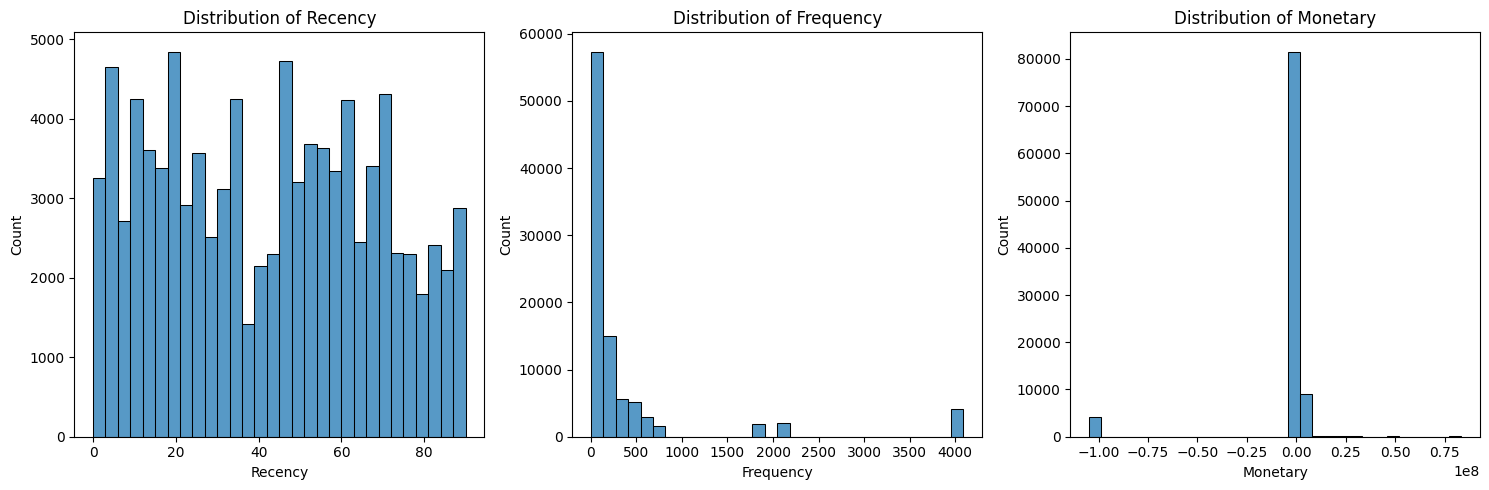

In [ ]:

plt.figure(figsize=(15, 5))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_rfms[col], bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()